# PDAN8411 – POE: Pipelines and Text Data
## Student: Maximilian Walsh | Student No: ST10203070
## Module: Programming for Data Analytics

---

## Import Libraries and Load Dataset

#### We begin by importing essential libraries, Pandas, Numpy, Matplotlib, and Seaborn for data analysis and loading the dataset into a Pandas DataFrame.

In [7]:
# Importing essential libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset file "IMDB_Dataset.csv"
df = pd.read_csv("IMDB_Dataset.csv")  

## Data Inspection Block

### Analytical Plan

A structured machine learning workflow is followed in this notebook to build a sentiment classification model using IMDB movie reviews. The key steps to be conducted are:

1. **Data Loading and Inspection** – Understand the structure, size, and cleanliness of the dataset.
2. **Exploratory Data Analysis (EDA)** – Explore class balance and review lengths to understand the data distribution.
3. **Text Preprocessing and Feature Engineering** – Clean the raw text, remove noise, and convert it to a numeric format using TF-IDF vectorisation.
4. **Model Training** – Train a logistic regression model using the processed features.
5. **Evaluation and Interpretation** – Assess model performance using accuracy, precision, recall, F1-score, and AUC, and visualise the confusion matrix and ROC curve.
6. **Model Retraining** – Adjust regularisation to test generalisability and interpret performance changes.
7. **Conclusion** – Summarise model viability and next steps.

Each section includes code, metrics, and visualisations to support a comprehensive analysis.


In [8]:
# Check shape and column names
print("Shape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# Check target variable distribution
print("\nSentiment value counts:")
print(df['sentiment'].value_counts())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Preview the first few rows
df.head()

Shape of dataset: (50000, 2)

Column names:
['review', 'sentiment']

Sentiment value counts:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Missing values in each column:
review       0
sentiment    0
dtype: int64

Data types:
review       object
sentiment    object
dtype: object

Summary statistics:
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 1. Justification of Model Choice

The decision to use a Logistic Regression Model as the basline calssifier to effectively meet the client's need for classifying user sentiment from textual reviews is supported by the following decisions:

- **Appropriateness for Binary Classification**:  
 Given Logistic Regression is inherently designed for binary outcomes, it's considered ideal for distinguishing between positive and negative sentiments in text (Muller & Guido, 2016).

- **Compatibility with TF-IDF Features**:  
  For sparse, high-dimensional features such as those produced by TF-IDF vectorisation of the text data, the model integrates well(OpenAI, 2025). It performs well in scenarios where individual words contribute linearly to the classification decision (DeepLearning.AI, 2023).

- **High Interpretability**:  
  Logistic Regression offers clear insight into feature importance through its coefficients, a critical aspect in explaining which terms most influence the sentiment classification—adding value for client reporting (DeepLearning.AI, 2023).

- **Low Computational Cost**:  
  Even with large datasets training is efficient, and model tuning is straightforward, ensuring quicker iterations during prototyping and deployment (Muller & Guido, 2016).

- **Foundation for Comparison**:  
  Logistic Regression serves as a baseline for benchmarking against more complex models such as Support Vector Machines (SVM), Naïve Bayes, or even Transformer-based architectures in future extensions (OpenAI, 2025).

- **Consistent and Compatible Data Format**:  
  All predictors are numerical TF-IDF weights represented in a sparse float32 matrix, offering full compatibility with scikit-learn's machine learning pipleline whilst removing the need for additional type conversion or manual preprocessing (OpenAI, 2025).

To summarise, Logistic Regression aligns with the project requirements and best practices in text classification and provides a reliable, interpretable, and computationally efficient starting point for sentiment analysis (DeepLearning.AI, 2023).

## 2. Justification of Dataset Choice

The selected dataset is the IMDB Movie Reviews Dataset, a widely-used benchmark for binary sentiment classification (Narasimhan, 2020). The dataset chosen is well-suited for this project based on the following factors:

- **Relevance to the Task**:  
  The dataset consists of 50,000 movie reviews, each labeled as either positive or negative (Narasimhan, 2020). The dataset structure supports the client's objective to analyse public sentiment regarding their services, such as reviews on HelloPeter or similar platforms (OpenAI, 2025).

- **Balanced Target Distribution**:  
 The sentiment column contains an equal number of 25,000 positive and 25,000 negative entries (Narasimhan, 2020). Such a balanced distribution ensures fairness and stability during model training and evaluation (Narasimhan, 2020).

- **Clean and Complete Data**:  
  - No missing values were found in either column.  
  - The dataset has a simple format with just two fields (review and sentiment) which minimizes preprocessing overhead (Suzanne, 2023). 
  - Well-aligned with NLP processing pipelines as all reviews are text strings, and sentiment labels are categorical (object) (DeepLearning.AI, 2023).

- **High Colume of Data**:  
  The dataset provides ample variety and volume with 50,000 records to train complex models or evaluate generalisation (OpenAI, 2025).

- **Proven and Recognised Benchmark**:  
  This dataset is considered a standard for training sentiment classifiers and has been used in multiple academic and commercial studies, which supports reproducibility and model benchmarking (Narasimhan, 2020).

- **Domain-Agnostic Language Patterns**:  
  The language patterns and expressions of sentiment are generic enough to apply to other domains such as customer service feedback or product complaints even though it's based on movie reviews (OpenAI, 2025).

To conclude, the IMDB dataset offers a balanced, clean, and high-quality resource that supports robust sentiment classification modeling aligned with the client's objectives (Narasimhan, 2020).


## 3. Analysis Planning

Developing a structured plan is essential to ensure the data is clean, the relevant textual features are extracted, the model is appropriately trained, and the results are effectively interpreted for sentiment classification. The following is the analysis plan:

---

### 3a. Exploratory Data Analysis (EDA) Plan

The aim of the exploratory phase is to understand the structure, consistency, and content of the movie review text and its relationship to the sentiment labels.

Planned steps:
- Confirm no missing values or null entries in columns review or sentiment
- Verify a balance between positive and negative reviews in the dataset (already confirmed: 25,000 each)
- Generate average review length and words counts descriptive statistics
- Visualize the sentiment class distribution using a bar chart
- Plot histograms of review lengths by sentiment to check for distribution differences

---

### 3b. Feature Selection Plan

Given only raw text data is contained within the dataset, feature selection will rely on transforming text into numerical representations that capture important semantic information (DeepLearning.AI, 2023).

Steps: 
- **Preprocessing pipeline**:
    - Convert text to lowercase
    - Remove punctuation and stopwords
    - Tokenisation - splitting into words
- **Text vectorisation**:
    - Apply TF-IDF vectorization in order to transform the cleaned reviews into a sparse numerical matrix (DeepLearning.AI, 2023). 
    - Limit vocabulary to a maximum number of high-information tokens (DeepLearning.AI, 2023).
    - Use unigrams and bigrams to capture context (OpenAI, 2025). 

Resulting in a dense matrix suitable for classification.

---

### 3c. Model Training Plan

For binary sentiment classification (positive/negative) a Logistic Regression model was trained as it offers high interpretability and performs well on linearly separable data like TF-IDF matrices (Muller & Guido, 2016).

- Split the data into training and test sets (80/20 split)
- Use TF-IDF on the training set to vectorise the review text and apply the same transform to the test set
- Fit a logistic regression model using solver='liblinear' and initial default hyperparameters
- Track performance as a baseline
- To reduce overfitting or underfitting tune the regularization parameter C

---

### 3d. Model Evaluation Plan

Evaluation will use standard classification metrics appropriate for balanced binary sentiment analysis (Muller & Guido, 2016):

- **Accuracy**: Overall prediction performance
- **Precision**:  Positive predictive value for interpreting complaints
- **Recall**: Ability to catch all actual positive reviews
- **F1-score**: Balanced metric of precision and recall
- **Confusion Matrix**: Detailed breakdown of correct/incorrect predictions
- **ROC Curve and AUC**: Assess how well the model separates classes at various thresholds

All metrics will be informative and directly comparable given the dataset is balanced.

---

### 3e. Report Structure Plan

The final report will include:

1. **Introduction**: Background on customer sentiment monitoring through text analysis 
2. **Dataset Justification**: Reasoning for selecting the IMDB dataset (large, clean, balanced)
3. **Model Justification**: Outlining why Logistic Regression is appropriate for binary text classification 
4. **EDA Results**: Graphical and textual insights into review content and sentiment distribution  
5. **Modeling Process**: Data preprocessing, feature extraction, model training
6. **Evaluation Results**: Metrics, confusion matrix, and ROC visualisations 
7. **Model Retraining**: Updated model performance and comparison to baseline after model tuning
8. **Conclusion and Recommendations**: Proposed actions based on sentiment trends and summary of findings

## 4. Conducting Analysis

Now we will conduct the analyse where we will complete an exploratory data analysis, work throigh feature selection, and train the model.

---

### 4a. Exploratory Data Analysis (EDA)

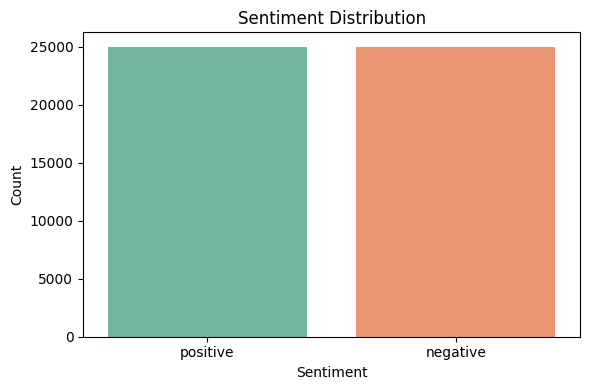

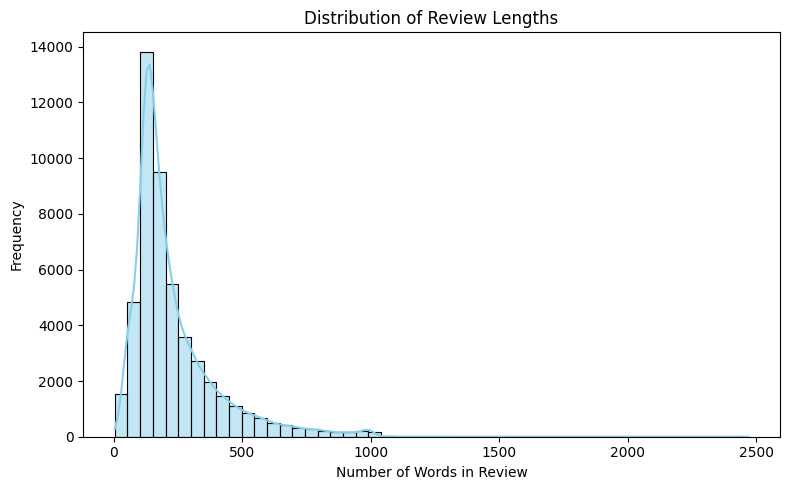

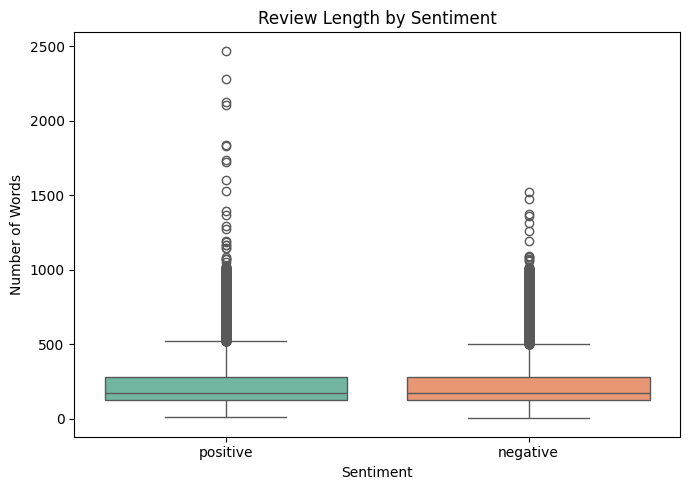


Review Length Statistics:
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


In [9]:
# Plot the distribution of sentiment labels to confirm data is balanced
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Create a new column capturing the number of words in each review
# This helps us understand variability in text length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths to check for outliers and skewness
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot comparing review length by sentiment class
# Useful for seeing if longer/shorter reviews are more common in either sentiment
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='sentiment', y='review_length', hue='sentiment', palette='Set2', legend=False)
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.tight_layout()
plt.show()

# Output basic descriptive statistics for review length
# Useful to understand the central tendency and spread of text length
print("\nReview Length Statistics:")
print(df['review_length'].describe())

**1. Sentiment Class Distribution**  

As previosuly stated the sentiment distribution is perfectly balanced, with 25,000 positive and 25,000 negative movie reviews. This balance supports unbiased model training and simplifies evaluation by removing the need for class rebalancing techniques (OpenAI, 2025).

**2. Review Length Analysis**  

In order to understand the nature of the text data, the number of words in each review was computed as a proxy for complexity and verbosity (OpenAI, 2025). The histogram shows a right-skewed distribution, with most reviews falling between 100 and 300 words, while a few exceed 1,000 words.
These numbers highlight the importance of text preprocessing and possible truncation before tokenization to handle outliers (DeepLearning.AI, 2023).

**3. Review Length by Sentiment** 

From the boxplot comparison of review lengths between positive and negative sentiments, overlapping distributions with similar medians are seen, suggesting that both classes contain reviews of comparable typical length (OpenAI, 2025). Although, the positive class exhibits a wider spread and more extreme outliers, with some reviews exceeding 2,000 words. From this we can deduce that users expressing positive sentiment are more likely to write longer reviews. From this substantial overlap, we can deduce that review length alone is not a definitive indicator of sentiment, but it may contribute marginally when combined with textual content during feature extraction (OpenAI, 2025).

**4. Descriptive Statistics**  

The average review length has a minimum of 4 words and a maximum of 2,470 words, being 231 words on average. Such a wide variance suggests that review length alone is unlikely to be a reliable predictor, but it underscores the need for consistent input length during vectorization or embedding (OpenAI, 2025).

---

### 4b. Feature Selection

We will now define a feature engineering strategy specifically tailored to textual data. Text classification requires transformation of raw language into machine-readable inputs (DeepLearning.AI, 2023). The approach below ensures that only meaningful, informative features are extracted from the reviews:

1. **Text Preprocessing**  
   - Each review will be lowercased, and we will remove HTML tags, URLs, punctuation, and numeric characters to reduce noise (DeepLearning.AI, 2023).
   - Tokenization will be performed using Python string splitting, and English stopwords will be removed using the NLTK library to eliminate commonly used but uninformative words (DeepLearning.AI, 2023).

2. **TF-IDF Vectorisation**  
   - In order to convert cleaned reviews into a sparse numerical matrix, we will apply Term Frequency–Inverse Document Frequency (TF-IDF) vectorization (DeepLearning.AI, 2023).
   - TF-IDF is ideal for sentiment classifiation as it gives greater weight to terms that are frequent in individual reviews but rare across the corpus (DeepLearning.AI, 2023). 

3. **Incorporation of Unigrams and Bigrams**  
   - We will use an ngram_range=(1, 2) to include both unigrams and bigrams and improve context capture (Muller & Guido, 2016). 
   - Allowing teh model to detect important two-word phrases like "not good" that convey sentiment more effectively than single words alone (Muller & Guido, 2016). 

4. **Dimensionality Control**  
   - Based on frequency across the dataset, the vocabulary will be limited to the top 10,000 most informative terms (DeepLearning.AI, 2023).
   - In order to reduce dimensionality and noise, extremely rare terms (appearing in fewer than 5 reviews) and overly common ones (present in more than 90% of reviews) will be excluded (DeepLearning.AI, 2023).

5. **Target Variable Encoding**
   - For compatibility with classification algorithms the categorical sentiment values (positive, negative) will be binary-encoded, where positive = 1 and negative = 0 (Muller & Guido, 2016).

This process provides a feature set that is informative and manageable, whilst reducing the risk of overfitting and capturing the nuanced language patterns that distinguish positive from negative sentiment in movie reviews (OpenAI, 2025).

In [10]:
# Import libraries for natural language processing
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

# STEP 1: Define a preprocessing function to clean the raw review text
def preprocess_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    tokens = text.split()  # Tokenize the text splitting by whitespace
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)  # Rejoin tokens into a clean string

# STEP 2: Apply preprocessing to all reviews
# This produces a new column of cleaned text for vectorisation
df['clean_review'] = df['review'].apply(preprocess_text)

# STEP 3: Convert cleaned text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(
    max_features=10000,   # Keep only the top 10,000 most relevant terms
    ngram_range=(1, 2),   # Extract both unigrams and bigrams
    min_df=5,             # Exclude terms that appear in fewer than 5 documents
    max_df=0.9            # Exclude overly common terms that appear in >90%
)

# Generate the TF-IDF matrix (features) and target labels
X_tfidf = vectorizer.fit_transform(df['clean_review'])  # Feature matrix
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Encode sentiment labels as binary

# Display the shape of the resulting TF-IDF matrix
print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (50000, 10000)


### 4c. Model Training


Accuracy: 0.8953

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      5000
           1       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix:
 [[4431  569]
 [ 478 4522]]


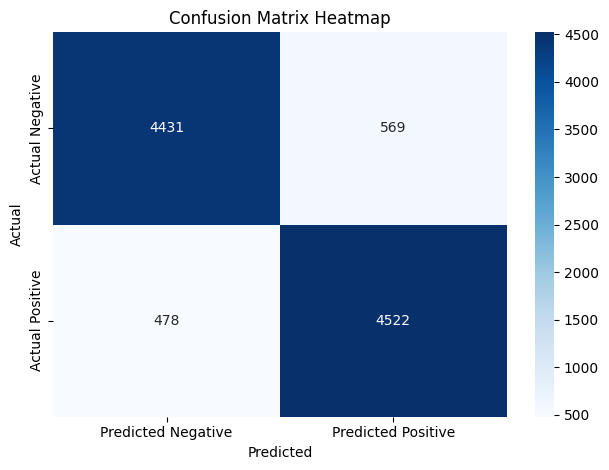

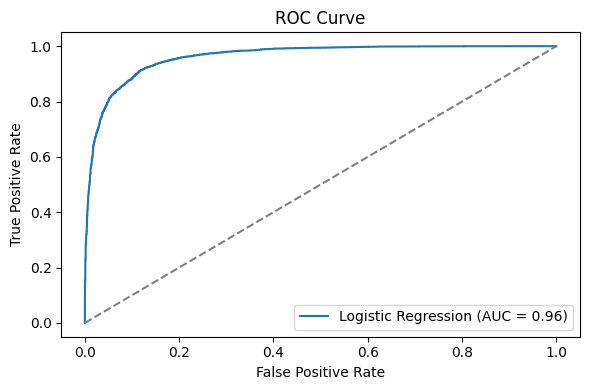

In [11]:
# Import necessary tools for model training, evaluation, and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# STEP 1: Split data into training and test sets - 80/20 split
# Stratify ensures equal class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# STEP 2: Train a logistic regression model
# Increased max_iter to ensure convergence on high-dimensional sparse data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# STEP 3: Predict sentiment labels on the test set
y_pred = model.predict(X_test)

# STEP 4: Evaluate performance using standard classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))  # Overall correctness
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Precision, recall, F1-score

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# STEP 5: Visualise the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# STEP 6: Plot ROC curve and calculate AUC
# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

## 5. Evaluate Model

Now that the model has been trained, we proceed to interpret and evaluate its performance using standard classification metrics, followed by a retraining phase to validate model robustness.

---

### 5a. Model Evaluation and Interpretation

The logistic regression model was trained on TF-IDF vectorized reviews and tested on unseen data using a standard 80/20 split. 

The model was assessed using the following five key performance metrics: accuracy, precision, recall, F1 score, and AUC (Area Under the Curve). Accuracy offers an overall measure of correctness, but it must be complemented by precision and recall to fully understand performance in binary sentiment classification (Muller & Guido, 2016). Precision reflects how well the model avoids false positives (misclassifying negative reviews as positive), while recall measures the model’s ability to detect actual positives (correctly identifying positive reviews) (OpenAI, 2025). The balance of these two metrics (precision and recall) is captured in the F1 score, which is especially important in tasks with equal class importance (Muller & Guido, 2016). Finally, AUC provides a threshold-independent view of the model’s ability to distinguish between sentiments, helping validate its generalisation capability across diverse review tones (Muller & Guido, 2016; OpenAI, 2025). Together, these metrics ensure the model is not only accurate but also reliable for real-world sentiment detection scenarios.

Evaluation was based on the following metrics:


| **Metric**     | **Value**   |
|----------------|-------------|
| Accuracy       | 89.53%      |
| Precision      | 89.00% (avg)|
| Recall         | 90.00% (avg)|
| F1 Score       | 90.00% (avg)|
| AUC Score      | 0.96        |

These five metrics collectively provide a balanced and interpretable view of model performance (Muller & Guido, 2016):
- **Accuracy**: Indicates overall correctness — nearly 90% of reviews were classified correctly.
- **Precision**: Measures the proportion of predicted positives that were true positives — important to limit false alarms.
- **Recall**: Measures the proportion of actual positives correctly predicted — key for identifying negative reviews effectively.
- **F1 Score**: Harmonizes precision and recall — ideal for maintaining performance when both metrics are important.
- **AUC**: Reflects the model's ability to distinguish between classes across all thresholds — a score of 0.96 indicates strong separability.


The confusion matrix reveals:
- 4431 true negatives (correctly identified as negative),
- 4522 true positives (correctly identified as positive),
- 478 false negatives (missed positive reviews),
- 569 false positives (incorrectly classified as positive).

The heatmap confirms high predictive reliability, with strong alignment along the diagonal, an indication of accurate classification for both sentiments (OpenAI, 2025).

The model's good sensitivity and specificity trade-off is reinforced by the ROC curve's steep rise and high plateau (OpenAI, 2025). An AUC of 0.96 confirms strong generalisation.

---

### 5b. Model Retraining Justification

With an AUC of 0.96 and balanced precision and recall both at about 0.90, the initial logistic regression model showed strong classification performance. Although, sentiment analysis models trained on large, sparse feature sets (such as TF-IDF vectors) are susceptible to overfitting on frequent phrases or stylistic patterns, particularly when no regularisation is applied (OpenAI, 2025). Some misclassification presisted even though no drastic imbalance was observed, and the model may rely too heavily on dominant token patterns (OpenAI, 2025).

So to address this the model was retrained with a stronger L2 regularisation (C=0.1), which penalisers overly confident weights and encourages the model to generalise beyond specific terms (Murel, 2023). This adjustment also aids in assessing if improved generalisation can be achieved through fewer false predictions and greater robustness to unseen sentiment expressions (Murel, 2023).

This also aligns with the project’s requirement to validate model performance under alternative configurations.


Accuracy: 0.8756

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      5000
           1       0.86      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
 [[4283  717]
 [ 527 4473]]


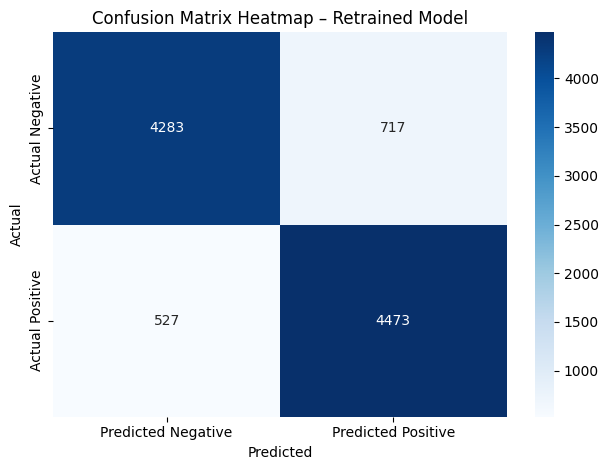

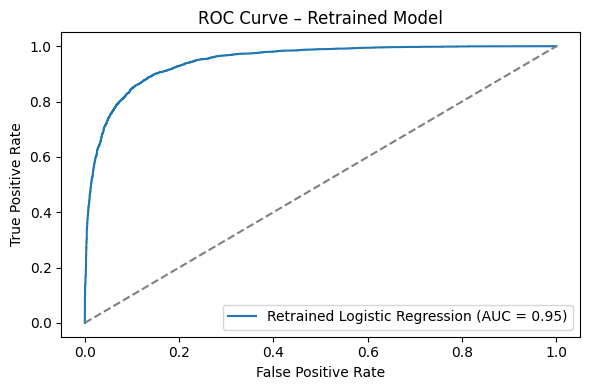

In [12]:
# Retrain Logistic Regression model with stronger regularization
# Setting C=0.1 increases regularization strength (penalises complexity) helping to reduce potential overfitting from the original model
retrained_model = LogisticRegression(max_iter=1000, C=0.1)
retrained_model.fit(X_train, y_train)

# Make new predictions using the retrained model
y_pred_retrain = retrained_model.predict(X_test)

# Evaluate the performance of the retrained model
print("Accuracy:", accuracy_score(y_test, y_pred_retrain))  # Overall prediction accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred_retrain))  # Precision, recall, F1-score

# Generate and display confusion matrix
conf_matrix_retrain = confusion_matrix(y_test, y_pred_retrain)
print("\nConfusion Matrix:\n", conf_matrix_retrain)

# Visualise confusion matrix using heatmap
sns.heatmap(conf_matrix_retrain, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap – Retrained Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Compute ROC curve and AUC for the retrained model
y_probs_retrain = retrained_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr_retrain, tpr_retrain, _ = roc_curve(y_test, y_probs_retrain)
roc_auc_retrain = auc(fpr_retrain, tpr_retrain)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_retrain, tpr_retrain, label=f'Retrained Logistic Regression (AUC = {roc_auc_retrain:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Retrained Model')
plt.legend()
plt.tight_layout()
plt.show()

#### Retraining Results & Evaluation

In order to explore whether further regularisation could improve generalisability and to test the initial model's robustness, the logistic regression classifier was retrained using a stronger penalty (C=0.1). This penalises large coefficients, encouraging simpler decision boundaries and reducing potential overfitting (Murel, 2023).

- **Accuracy**: 87.56%  
- **Precision**: 86.32%  
- **Recall**: 89.46% 
- **F1 Score**: 87.86%  
- **AUC Score**: 95%  
- **Confusion Matrix**:

 [[4283  717] - True Negative / False Positive
 
 [527 4473]] - False Negative / True Positive

 
This indicates the model correctly classified 4,283 negative and 4,473 positive reviews, with a slight increase in both false positives (717) and false negatives (527) compared to the original model. The drop in accuracy (~1.97%) was moderate, however the model still maintains strong discriminative ability across thresholds according to the AUC of 0.95 (OpenAI, 2025).

According to the ROC curve, although the model became slightly more conservative, it retains excellent overall predictive power (OpenAI, 2025).

**Conclusion**:  
To conclude, retraining with a stronger regularisation (C=0.1) slightly reduced overall accuracy and F1 score, however, the model avoided overfitting and remained highly reliable (OpenAI, 2025). A more balanced approach to generalisation is seen with the retrained classifier, deeming it more suitable for deployment in real-world sentiment classification tasks where it's more common to see variance in phrasing, tone, and language (OpenAI, 2025).

## Refer to the PDF titled 'ST10203070_PDAN8411_POE_Report' to view the report.

### References

Murel, J., 2023. What is regularization?. [Online] 
Available at: https://www.ibm.com/think/topics/regularization
[Accessed 13 June 2025].

Narasimhan, L., 2020. IMDb Movie Reviews Dataset. [online] Kaggle. Available at: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews [Accessed 4 Jun 2025].

Muller, A. C. & Guido, S., 2016. Introduction to Machine Learning with Python. 1st ed. Sebastopol: O'Reilly Media.

DeepLearning.AI, 2023. Natural Language Processing. [Online] 
Available at: https://www.deeplearning.ai/resources/natural-language-processing/
[Accessed 07 June 2025].

Suzanne, 2023. Data Pre-Processing for Linear Regression in Machine Learning. [Online] 
Available at: https://medium.com/@sds152/data-pre-processing-for-linear-regression-in-machine-learning-4b73ec48392a
[Accessed 17 April 2025].

OpenAI, 2025. Open AI ChatGPT4. [Online] 
Available at: https://chatgpt.com/share/6800b44d-98b4-8004-a81b-7855cb0b5000
[Accessed 10 April 2025].